In [8]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

image_data = nib.load('../images/FLAIR.nii.gz')
image = image_data.get_fdata()

In [9]:
def region_growing_image(image, x=100, y=100, z=20, tol=50):
    segmentation = np.zeros_like(image)
    if segmentation[x, y, z] == 1:
        return segmentation
    
    valor_medio_cluster = image[x, y, z]
    segmentation[x, y, z] = 1
    vecinos = [(x, y, z)]
    
    while vecinos:
        x, y, z = vecinos.pop()
        
        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                for dz in [-1, 0, 1]:
                    # Obtener las coordenadas del vecino
                    nx, ny, nz = x + dx, y + dy, z + dz
                    
                    # Comprobar que las coordenadas están dentro de los límites de la imagen
                    if 0 <= nx < image.shape[0] and 0 <= ny < image.shape[1] and 0 <= nz < image.shape[2]:
                        # Comprobar la condición de crecimiento de región
                        if np.abs(valor_medio_cluster - image[nx, ny, nz]) < tol and segmentation[nx, ny, nz] == 0:
                            segmentation[nx, ny, nz] = 1
                            vecinos.append((nx, ny, nz))
    
    return segmentation

In [10]:
segmentation = region_growing_image(image)


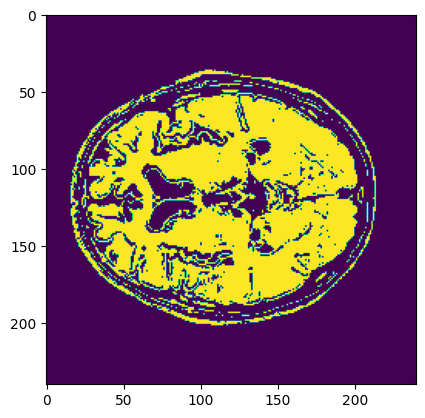

In [11]:
plt.imshow(segmentation[:, :, 20])